In [1]:
import numpy as np # linear algebra
import pandas as pd # processing data 
import matplotlib.pyplot as plt 
import seaborn as sns # visualization tool

In [3]:
dataset = pd.read_csv('BlackFriday.csv')
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
# remove NaN values and set it to 0
dataset.Product_Category_2.fillna(0, inplace=True)
dataset.Product_Category_3.fillna(0, inplace=True)

dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [6]:
dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,6.784907,3.871773,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,6.211618,6.265963,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,0.000000,0.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,0.000000,0.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,5.000000,0.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,14.000000,8.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [9]:
dataset.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023024,0.018732,0.003687,0.003663,0.003938,0.005389
Occupation,-0.023024,1.000000,0.024691,-0.008114,0.006792,0.011941,0.021104
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.001146,-0.004363,0.000129
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,-0.040730,-0.389048,-0.314125
Product_Category_2,0.003663,0.006792,0.001146,-0.040730,1.000000,0.090284,0.038395
Product_Category_3,0.003938,0.011941,-0.004363,-0.389048,0.090284,1.000000,0.284120
Purchase,0.005389,0.021104,0.000129,-0.314125,0.038395,0.284120,1.000000


In [11]:
dataset.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
def setAgeCat(age):
    if age == "0-17":
        return 1
    elif age == "18-25":
        return 2
    elif age == "26-35":
        return 3
    elif age == "36-45":
        return 4
    elif age == "46-50":
        return 5
    elif age == "51-55":
        return 6
    elif age == "55+":
        return 7
    else:
        return 0
    
# Add new columns
dataset['AgeCategory'] = dataset.apply(lambda row: setAgeCat(row['Age']), axis=1)
dataset['GenderCategory'] = [1 if gen == 'F' else 0 for gen in dataset.Gender]
dataset.info()
        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 14 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
AgeCategory                   537577 non-null int64
GenderCategory                537577 non-null int64
dtypes: float64(2), int64(7), object(5)
memory usage: 57.4+ MB


In [15]:
# filter people between 46-50(AgeCategory=5), Marital_Status = 1, City_Category=A
filtered_data = dataset[(dataset.AgeCategory == 5) & (dataset.Marital_Status == 1) & (dataset.City_Category == "A")]
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5079 entries, 164 to 537128
Data columns (total 14 columns):
User_ID                       5079 non-null int64
Product_ID                    5079 non-null object
Gender                        5079 non-null object
Age                           5079 non-null object
Occupation                    5079 non-null int64
City_Category                 5079 non-null object
Stay_In_Current_City_Years    5079 non-null object
Marital_Status                5079 non-null int64
Product_Category_1            5079 non-null int64
Product_Category_2            5079 non-null float64
Product_Category_3            5079 non-null float64
Purchase                      5079 non-null int64
AgeCategory                   5079 non-null int64
GenderCategory                5079 non-null int64
dtypes: float64(2), int64(7), object(5)
memory usage: 595.2+ KB


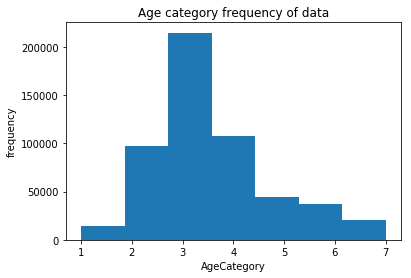

In [17]:
# plot graphs, age category frequency of data
plt.hist(dataset.AgeCategory, bins=7)
plt.xlabel('AgeCategory')
plt.ylabel('frequency')
plt.title('Age category frequency of data')
plt.show()